In [1]:
using Distributions, StatsPlots, Random, Base.Threads
default(fmt = :png)

function plot_samplemean_and_unbiasedvar(dist, n; L=10^4, kwargs...)
    distname = replace(string(dist), r"{[^}]*}"=>"")
    X̄ = zeros(L)
    S² = zeros(L)
    tmp = [zeros(eltype(dist), n) for _ in 1:nthreads()]
    @threads for i in eachindex(X̄, S²)
        X = rand!(dist, tmp[threadid()])
        X̄[i] = mean(X)
        S²[i] = var(X)
    end
    scatter(X̄, S²; label="", ms=2.5, ma=0.3, msw=0, kwargs...)
    title!("$distname, n=$n")
end

plot_samplemean_and_unbiasedvar (generic function with 1 method)

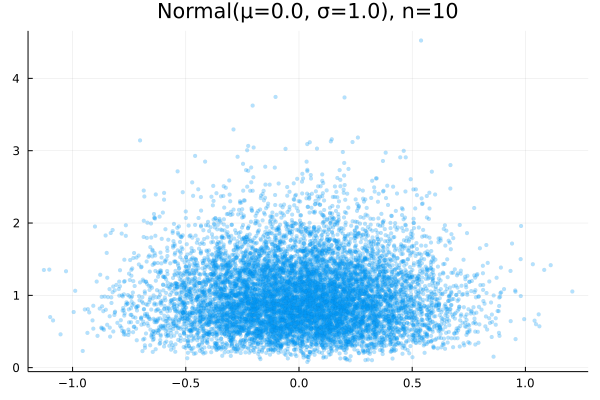

In [2]:
plot_samplemean_and_unbiasedvar(Normal(), 10)

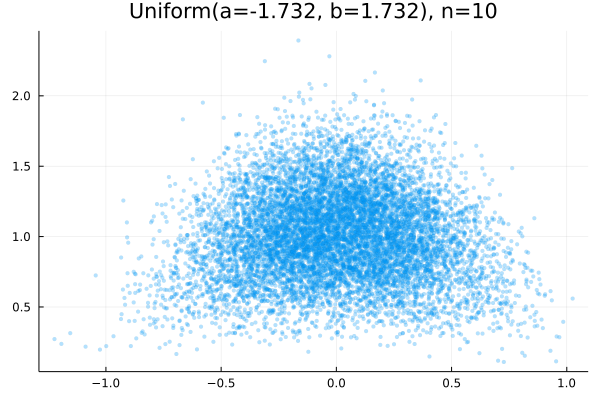

In [3]:
plot_samplemean_and_unbiasedvar(Uniform(-1.732, 1.732), 10)

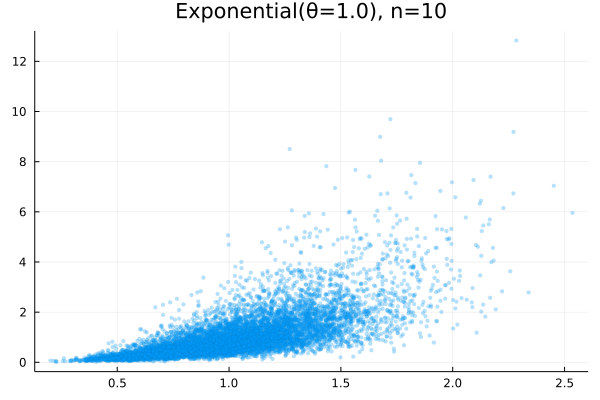

In [4]:
plot_samplemean_and_unbiasedvar(Exponential(), 10)

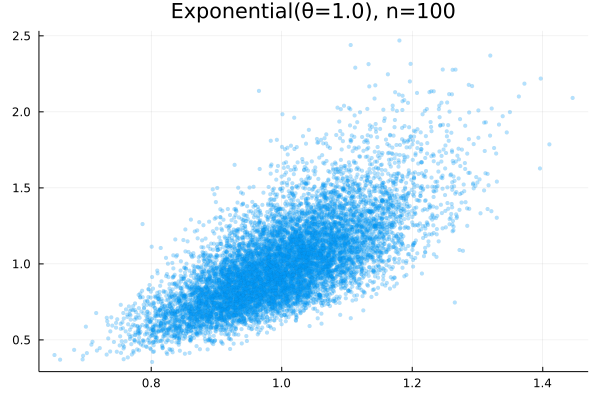

In [5]:
plot_samplemean_and_unbiasedvar(Exponential(), 100)

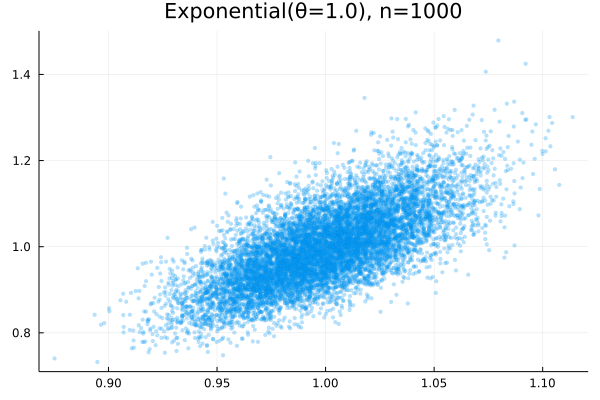

In [6]:
plot_samplemean_and_unbiasedvar(Exponential(), 1000)

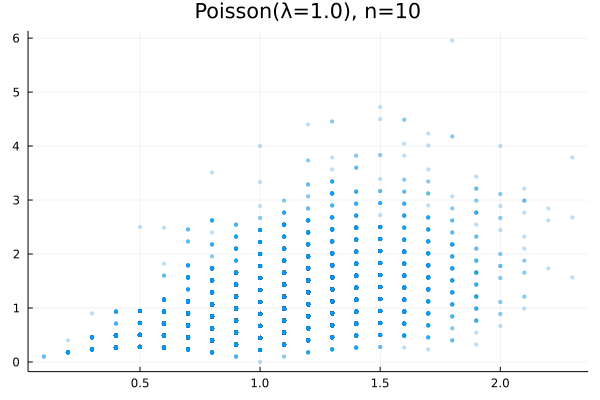

In [7]:
plot_samplemean_and_unbiasedvar(Poisson(), 10)

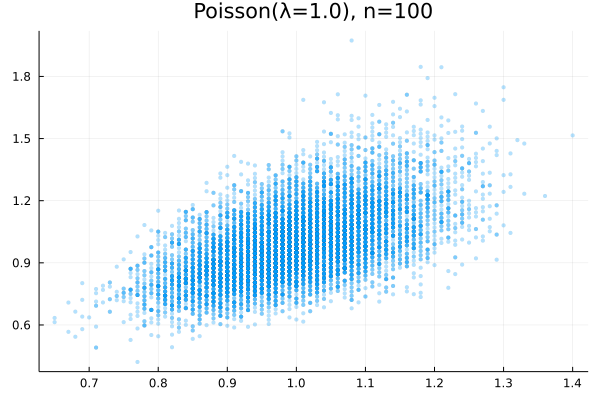

In [8]:
plot_samplemean_and_unbiasedvar(Poisson(), 100)

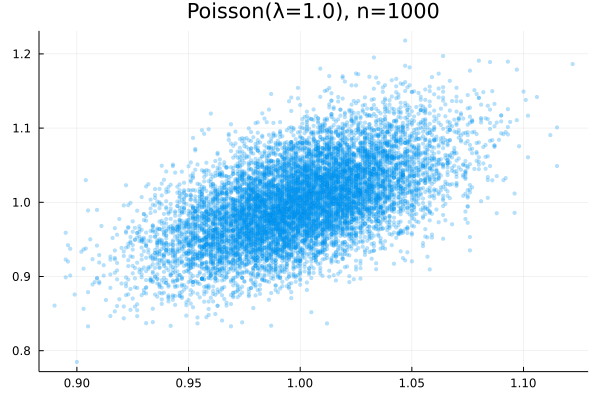

In [9]:
plot_samplemean_and_unbiasedvar(Poisson(), 1000)

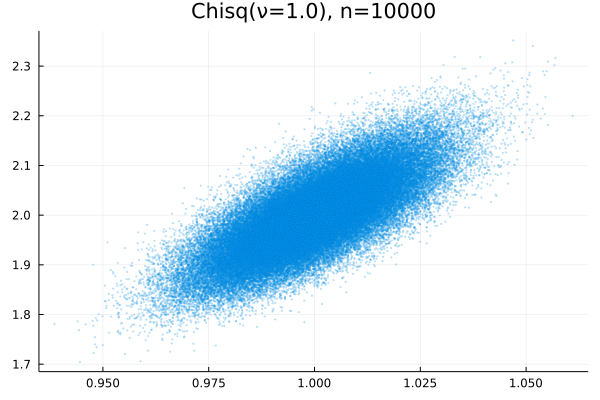

In [10]:
plot_samplemean_and_unbiasedvar(Chisq(1), 10000; L=10^5, ms=2, alpha=0.05)